# Visualizing NLU analysis of customer messages

## Default models vs. custom model

This notebook demonstrates visualizing the results from analyzing customer messages using Watson Natural Language Understanding.

Results from using the default NLU models are compared with results from using a custom language model.

- Import saved analysis results
- Example 1: Word clouds
- Example 2: Bar charts
- Example 3: Clustering

## Import saved analysis results

In the [Exploring NLU](https://github.com/spackows/CASCON-2019_NLP-workshops/blob/master/notebooks/Notebook-1_Exploring-NLU.ipynb) notebook, we saved NLU results in a JSON file as a Project Asset.

In the [Normalizing custom model results](https://github.com/spackows/CASCON-2019_NLP-workshops/blob/master/notebooks/Notebook-4_Normalize-custom-model-results.ipynb) notebook, we saved normalized custom language results in a JSON file as a Project Asset too.

To import the saved data into this notebook, perform these steps for each asset:
1. Open the data panel by clicking on the **Find and Add Data** icon ( <img style="margin: 0px; padding: 0px; display: inline;" src="https://github.com/spackows/CASCON-2019_NLP-workshops/raw/master/images/find-add-data-icon.png"/> )
2. Click on the first empty cell below
3. In the data panel, under the file named <code>NLU-results.json</code> click **Insert to code** and then select "Insert Credentials"
4. Click on the second empty cell below
5. In the data panel, under the file named <code>NLU-results-custom-model-normalized.json</code> click **Insert to code** and then select "Insert Credentials"

In [3]:
# Define a helper function for copying files from  
# Project storage to the notebook working directory
#

from ibm_botocore.client import Config
import ibm_boto3

def copyToNotebookDir( credentials ):
    cos = ibm_boto3.client(
        service_name='s3',
        ibm_api_key_id=credentials['IBM_API_KEY_ID'],
        ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
        ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
        config=Config(signature_version='oauth'),
        endpoint_url=credentials['ENDPOINT'])
    cos.download_file(Bucket=credentials['BUCKET'],Key=credentials['FILE'],Filename=credentials['FILE'])
    print( "Done: '" + credentials['FILE'] + "'" )

In [4]:
copyToNotebookDir( credentials_1 )
copyToNotebookDir( credentials_2 )

Done: 'NLU-results.json'
Done: 'NLU-results-custom-model-normalized.json'


In [5]:
import json
with open( credentials_1['FILE'] ) as json_file:
    default_results_list = json.load(json_file)
default_results_list[0:3]

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'actions': ['help'],
  'keywords': ['Good morning', 'shapefile'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'actions': ['to place', 'to import'],
  'keywords': ['Good night', 'file', 'notebook'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'actions': ['do', 'be'],
  'keywords': ['csv file', 'hai', 'tutorial'],
  'spacer': ''}]

In [6]:
with open( credentials_2['FILE'] ) as json_file:
    custom_results_list = json.load(json_file)
custom_results_list[0:3]

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'actions': ['load'],
  'objects': ['shapefile'],
  'tech': [],
  'docs': [],
  'persona': [],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'actions': ['import'],
  'objects': ['notebook'],
  'tech': [],
  'docs': [],
  'persona': [],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'actions': ['analyze'],
  'objects': [],
  'tech': [],
  'docs': ['tutorial'],
  'persona': [],
  'spacer': ''}]

## Example 1: Word clouds

Display the most common words, using the size of the word to indicate how frequently it appears.

See: [word_cloud](https://github.com/amueller/word_cloud/blob/master/README.md)

In [7]:
# The word cloud functions expect a string full of words.  We have
# lists of actions and lists of keywords, so we need to assemble 
# those lists into single strings.
#
default_actions_str  = ""
default_keywords_str = ""
for result in default_results_list:
    if( len(result["actions"]) > 0 ):
        default_actions_str += ' '.join(result["actions"]) + " "
    if( len(result["keywords"]) > 0 ):
        default_keywords_str += ' '.join(result["keywords"]) + " "
        
custom_actions_str = ""
custom_obj_str = ""
custom_tech_str = ""
for result in custom_results_list:
    if( len(result["actions"]) > 0 ):
        custom_actions_str += ' '.join(result["actions"]) + " "
    if( len(result["objects"]) > 0 ):
        custom_obj_str += ' '.join(result["objects"]) + " "
    if( len(result["tech"]) > 0 ):
        custom_tech_str += ' '.join(result["tech"]) + " "
        
print( "Default actions:\n" + default_actions_str[0:100] + "...\n" )
print( "Default keywords:\n" + default_keywords_str[0:100] + "...\n" )
print( "Custom actions:\n" + custom_actions_str[0:100] + "...\n" )
print( "Custom objects:\n" + custom_obj_str[0:100] + "...\n" )
print( "Custom tech:\n" + custom_tech_str[0:100] + "...\n" )

Default actions:
help to place to import do be try try to edit keep download use deploy to start create be be have cr...

Default keywords:
Good morning shapefile Good night file notebook csv file hai tutorial issues setup WML service Im id...

Custom actions:
load import analyze set up edit download create log in connect create create load exceed access log ...

Custom objects:
shapefile notebook notebook notebook model notebook notebook account limit account flow project note...

Custom tech:
machine learning r machine learning r spark cloudant machine learning object storage cloudant machin...



In [ ]:
!pip install wordcloud

In [9]:
# Create word cloud objects
#
from wordcloud import WordCloud
from wordcloud import STOPWORDS
my_stopwords = { "try", "keep", "use", "want", "need", "know", "give", "help", "tell", "might", "cant", "say", "cause" "place" }
wordcloud_default_actions = WordCloud( stopwords=STOPWORDS.union( my_stopwords ) ).generate( default_actions_str )
wordcloud_default_keywords = WordCloud().generate( default_keywords_str )
wordcloud_custom_actions = WordCloud().generate( custom_actions_str )
wordcloud_custom_objects = WordCloud().generate( custom_obj_str )
wordcloud_custom_tech = WordCloud().generate( custom_tech_str )

In [10]:
# Define a helper function for plotting the word clouds
#
import matplotlib.pyplot as plt
def wordcloud_plot( details_arr ):
    num_wordclouds = len( details_arr )
    fig, axs = plt.subplots( 1, num_wordclouds, figsize=( num_wordclouds*10, 10 ) )
    if( num_wordclouds < 2 ):
        axs.imshow( details_arr[0]["wordcloud"] )
        axs.set_title( details_arr[0]["title"], fontsize=20 )
        axs.axis( "off" )
    else:
        for i in range( num_wordclouds ):
            axs[i].imshow( details_arr[i]["wordcloud"] )
            axs[i].set_title( details_arr[i]["title"], fontsize=20 )
            axs[i].axis( "off" )

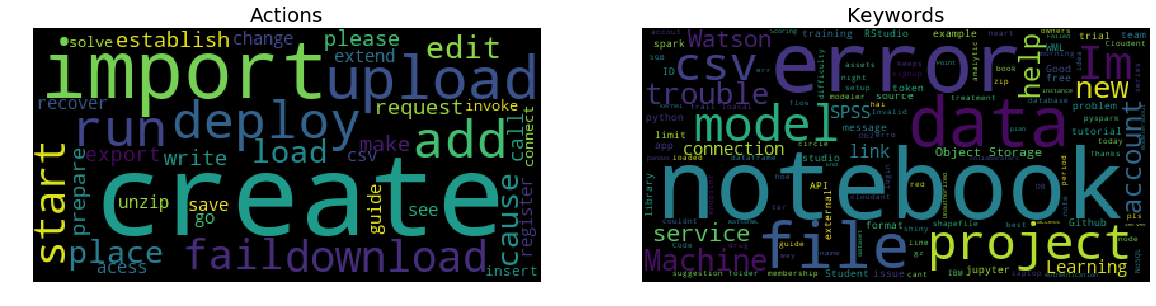

In [11]:
# Plot the word clouds
#
wordcloud_plot( [ { "title" : "Actions",  "wordcloud" : wordcloud_default_actions },
                  { "title" : "Keywords", "wordcloud" : wordcloud_default_keywords } ] )

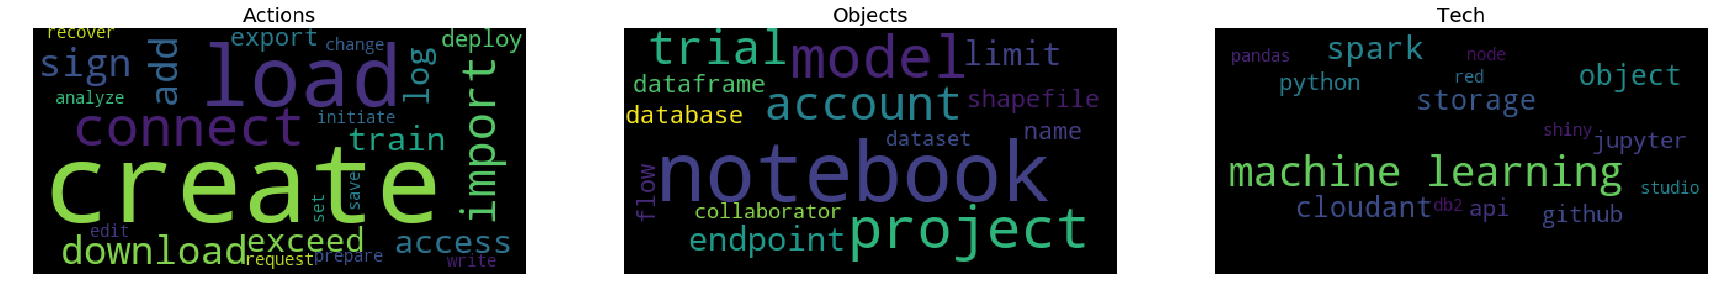

In [12]:
# Plot the word clouds
#
wordcloud_plot( [ { "title" : "Actions", "wordcloud" : wordcloud_custom_actions },
                  { "title" : "Objects", "wordcloud" : wordcloud_custom_objects },
                  { "title" : "Tech",    "wordcloud" : wordcloud_custom_tech } ] )

## Example 2: Bar charts

Count the important words, and then plot bar charts to show the most common words.

In [38]:
# Define a helper function for counting words
#
from collections import OrderedDict
def countWords( results_list, entity_type, minimum ):
    all_words = {}
    for result in results_list:
        words_arr = result[entity_type]
        for word in words_arr:
            if( word not in all_words ):
                all_words[word] = 0
            all_words[word] += 1
    common_words = dict( [ (k,v) for k,v in all_words.items() if v > minimum ] )
    ordered_common_words = OrderedDict( sorted( common_words.items(), key=lambda x:x[1], reverse=True ) )
    return ordered_common_words

In [48]:
# Count the words
#
default_actions  = countWords( default_results_list, "actions",  3 )
default_keywords = countWords( default_results_list, "keywords", 3 )
custom_actions   = countWords( custom_results_list,  "actions",  2 )
custom_objects   = countWords( custom_results_list,  "objects",  1 )
custom_tech      = countWords( custom_results_list,  "tech",     1 )

In [56]:
# Create some structures to make it easier to plot the charts
#
import random
from matplotlib import colors as mcolors
import numpy as np

def random_colours( num ):
    rand_indexes = random.sample(range(0, len( mcolors.CSS4_COLORS.keys() ) - 1 ), num )
    colour_list = [ list( mcolors.CSS4_COLORS.keys() )[i] for i in rand_indexes ]
    return colour_list

values_default_action      = list( default_actions.values() )[0:6]
labels_default_action      = list( default_actions.keys() )[0:6]
num_bars_default_action    = len( labels_default_action )
positions_default_action   = np.arange( num_bars_default_action )
colours_default_action     = random_colours( num_bars_default_action )

values_default_keywords    = list( default_keywords.values() )[0:6]
labels_default_keywords    = list( default_keywords.keys() )[0:6]
num_bars_default_keywords  = len( labels_default_keywords )
positions_default_keywords = np.arange( num_bars_default_keywords )
colours_default_keywords   = random_colours( num_bars_default_keywords )

values_custom_action       = list( custom_actions.values() )[0:6]
labels_custom_action       = list( custom_actions.keys() )[0:6]
num_bars_custom_action     = len( labels_custom_action )
positions_custom_action    = np.arange( num_bars_custom_action )
colours_custom_action      = random_colours( num_bars_custom_action )

values_custom_obj          = list( custom_objects.values() )[0:6]
labels_custom_obj          = list( custom_objects.keys() )[0:6]
num_bars_custom_obj        = len( labels_custom_obj )
positions_custom_obj       = np.arange( num_bars_custom_obj )
colours_custom_obj         = random_colours( num_bars_custom_obj )

values_custom_tech         = list( custom_tech.values() )[0:6]
labels_custom_tech         = list( custom_tech.keys() )[0:6]
num_bars_custom_tech       = len( labels_custom_tech )
positions_custom_tech      = np.arange( num_bars_custom_tech )
colours_custom_tech        = random_colours( num_bars_custom_tech )

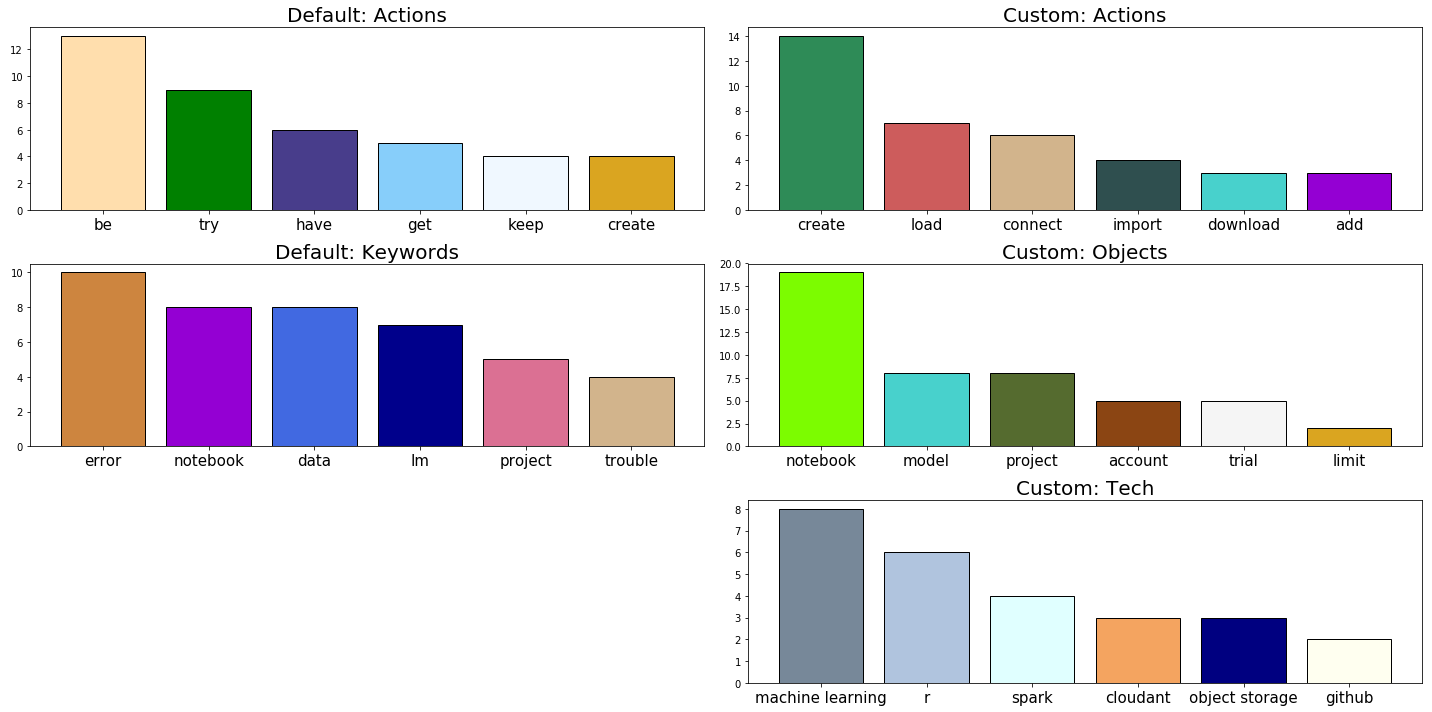

In [57]:
# Plot results side by side
#
fig, axs = plt.subplots( 3, 2, figsize=( 20, 10 ) )
axs[0,0].bar( positions_default_action,   values_default_action,   color=colours_default_action,   edgecolor="black" )
axs[1,0].bar( positions_default_keywords, values_default_keywords, color=colours_default_keywords, edgecolor="black" )
axs[0,1].bar( positions_custom_action,    values_custom_action,    color=colours_custom_action,    edgecolor="black" )
axs[1,1].bar( positions_custom_obj,       values_custom_obj,       color=colours_custom_obj,       edgecolor="black" )
axs[2,1].bar( positions_custom_tech,      values_custom_tech,      color=colours_custom_tech,      edgecolor="black" )
axs[0,0].set_title( 'Default: Actions',  fontsize=20 )
axs[1,0].set_title( 'Default: Keywords', fontsize=20  )
axs[0,1].set_title( 'Custom: Actions',   fontsize=20  )
axs[1,1].set_title( 'Custom: Objects',   fontsize=20  )
axs[2,1].set_title( 'Custom: Tech',      fontsize=20  )
plt.sca(axs[0,0])
plt.xticks( positions_default_action,   labels_default_action,   fontsize=15 )
plt.sca(axs[1,0])
plt.xticks( positions_default_keywords, labels_default_keywords, fontsize=15 )
plt.sca(axs[0,1])
plt.xticks( positions_custom_action,    labels_custom_action,    fontsize=15 )
plt.sca(axs[1,1])
plt.xticks( positions_custom_obj,       labels_custom_obj,       fontsize=15 )
plt.sca(axs[2,1])
plt.xticks( positions_custom_tech,      labels_custom_tech,      fontsize=15 )
axs[2,0].axis('off')
fig.tight_layout()
plt.show()

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.